In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from mlxtend.frequent_patterns import apriori, association_rules


In [50]:
data = pd.read_excel(r"C:\Users\mdirf\Downloads\Association Rules\Association Rules\Online retail.xlsx")
print("Dataset shape:", data.shape)
data.head()


Dataset shape: (7500, 1)


,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [ ]:
transactions = [str(row[0]).split(',') for _, row in data.iterrows()]

# Create the basket format from the list of transactions
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

basket = pd.DataFrame(te_ary, columns=te.columns_).astype(bool)

print("Data converted into basket format successfully!")
print("Shape:", basket.shape)
basket.head()

Data converted into basket format successfully!
Shape: (7500, 120)


C:\Users\mdirf\AppData\Local\Temp\ipykernel_14892\553550799.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  transactions = [str(row[0]).split(',') for _, row in data.iterrows()]


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_items = apriori(basket, min_support=0.1, use_colnames=True)
print("Frequent itemsets found:", len(frequent_items))

if len(frequent_items) > 0:
    rules = association_rules(frequent_items, metric="lift", min_threshold=1)
    print("Association rules generated:", len(rules))
    display(rules.head())
else:
    print(" No frequent itemsets found — try lowering support to 0.05 or 0.01.")


Frequent itemsets found: 7
Association rules generated: 0


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


In [54]:
found = False
for support in [0.1, 0.05, 0.02, 0.01]:
    frequent_items = apriori(basket, min_support=support, use_colnames=True)
    print(f"\nSupport={support}, Itemsets={len(frequent_items)}")

    for conf in [0.1, 0.2, 0.3, 0.4]:
        rules = association_rules(frequent_items, metric="confidence", min_threshold=conf)
        if len(rules) > 0:
            print(f"Found {len(rules)} rules (Support={support}, Confidence={conf})")
            display(rules.sort_values(by=['lift', 'confidence'], ascending=False).head(10))
            found = True
            break
    if found:
        break

if not found:
    print(" No rules found even at low thresholds — try further lowering support to 0.005.")



Support=0.1, Itemsets=7

Support=0.05, Itemsets=28
Found 6 rules (Support=0.05, Confidence=0.1)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
4,(spaghetti),(mineral water),0.174133,0.238267,0.059733,0.343032,1.439698,1.0,0.018243,1.159468,0.369806,0.169376,0.137536,0.296866
5,(mineral water),(spaghetti),0.238267,0.174133,0.059733,0.250699,1.439698,1.0,0.018243,1.102184,0.400941,0.169376,0.092710,0.296866
0,(chocolate),(mineral water),0.163867,0.238267,0.052667,0.321400,1.348907,1.0,0.013623,1.122506,0.309351,0.150706,0.109136,0.271220
1,(mineral water),(chocolate),0.238267,0.163867,0.052667,0.221041,1.348907,1.0,0.013623,1.073398,0.339566,0.150706,0.068379,0.271220
3,(eggs),(mineral water),0.179733,0.238267,0.050933,0.283383,1.189351,1.0,0.008109,1.062957,0.194090,0.138758,0.059228,0.248574
2,(mineral water),(eggs),0.238267,0.179733,0.050933,0.213766,1.189351,1.0,0.008109,1.043286,0.209004,0.138758,0.041490,0.248574


Top 5 Association Rules:



,antecedents,consequents,support,confidence,lift
4,(spaghetti),(mineral water),0.059733,0.343032,1.439698
5,(mineral water),(spaghetti),0.059733,0.250699,1.439698
0,(chocolate),(mineral water),0.052667,0.321400,1.348907
1,(mineral water),(chocolate),0.052667,0.221041,1.348907
3,(eggs),(mineral water),0.050933,0.283383,1.189351


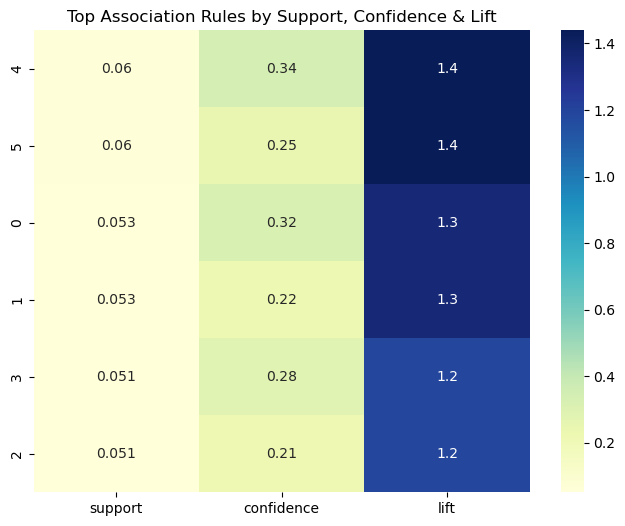

In [58]:
# Sort and view the strongest rules
rules = rules.sort_values(by=['lift', 'confidence'], ascending=False)
print("Top 5 Association Rules:\n")
display(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

#Heatmap Visualization 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(rules[['support', 'confidence', 'lift']].head(10), annot=True, cmap="YlGnBu")
plt.title("Top Association Rules by Support, Confidence & Lift")
plt.show()


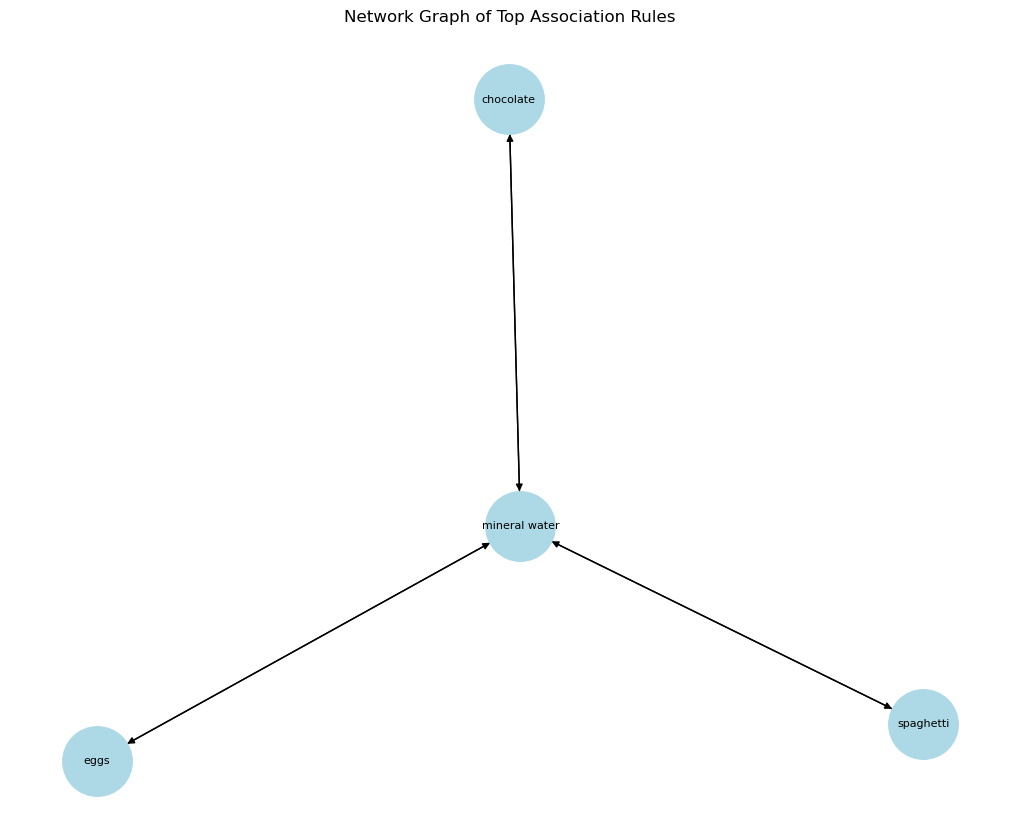

In [57]:
import networkx as nx

G = nx.DiGraph()
for _, rule in rules.head(10).iterrows():
    G.add_edge(', '.join(list(rule['antecedents'])),
               ', '.join(list(rule['consequents'])),
               weight=rule['lift'])

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2500, font_size=8, arrows=True)
plt.title("Network Graph of Top Association Rules")
plt.show()

In [ ]:
# 1. What is Lift and why is it important in Association Rules?
# Lift measures how much more likely the consequent is purchased when the antecedent is bought,compared to random chance.
# A lift greater than 1 indicates a positive association, making it important for identifying meaningful relationships between items.